1.Read the dataset

In [ ]:
import pandas as pd

In [ ]:
housing_pd = pd.read_csv('/content/housing.csv')
housing_pd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


2.Explore Dataset

In [ ]:
housing_pd['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing_pd_shuffled = housing_pd.sample(n=len(housing_pd),random_state=1)
housing_pd_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [ ]:
pd.get_dummies(housing_pd_shuffled['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,1,0,0,0,0
2151,0,1,0,0,0
15927,0,0,0,1,0
82,0,0,0,1,0
8161,1,0,0,0,0


3.Drop variable

In [ ]:
housing_pd_shuffled.drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


In [ ]:
housing_pd_final=pd.concat([housing_pd_shuffled.drop('ocean_proximity', axis=1),
                           pd.get_dummies(housing_pd_shuffled['ocean_proximity'])],axis=1)

In [ ]:
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,1,0,0,0,0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,0,1,0,0,0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,0,0,0,1,0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,0,0,0,1,0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,1,0,0,0,0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,1,0,0,0,0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,1,0,0,0,0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,0,1,0,0,0


In [ ]:
housing_pd_final=housing_pd_final[['longitude','latitude',
                                   'housing_median_age','total_rooms',
                                   'total_bedrooms','population',
                                   'households','median_income',
                                   '<1H OCEAN','INLAND',
                                   'ISLAND','NEAR BAY',
                                   'NEAR OCEAN','median_house_value']]
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,1,0,0,0,0,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,0,1,0,0,0,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,0,0,0,1,0,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,0,0,0,1,0,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,1,0,0,0,0,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,1,0,0,0,0,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,1,0,0,0,0,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,1,0,0,0,0,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,0,1,0,0,0,140700.0


In [ ]:
housing_pd_final=housing_pd_final.dropna()
len(housing_pd_final)

20433

4.Split the DataSet

In [ ]:
train_pd,test_pd,val_pd=housing_pd_final[:18000],housing_pd_final[18000:19217],housing_pd_final[19217:]
len(train_pd),len(test_pd),len(val_pd)

(18000, 1217, 1216)

In [ ]:
X_train,y_train = train_pd.to_numpy()[:, :-1],train_pd.to_numpy()[:, -1]
X_val,y_val=val_pd.to_numpy()[:, :-1],val_pd.to_numpy()[:, -1]
X_test,y_test=test_pd.to_numpy()[:, :-1],test_pd.to_numpy()[:, -1]

In [ ]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((18000, 13), (18000,), (1216, 13), (1216,), (1217, 13), (1217,))

5.Make StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(X_train[: , :8])

def preprocessor(X):
    A = np.copy(X)
    A[:, :8] = scaler.transform(A[: , : 8])
    return A

X_train,X_val,X_test= preprocessor(X_train),preprocessor(X_val),preprocessor(X_test)
X_train.shape,X_val.shape,X_test.shape

((18000, 13), (1216, 13), (1217, 13))

<Axes: >

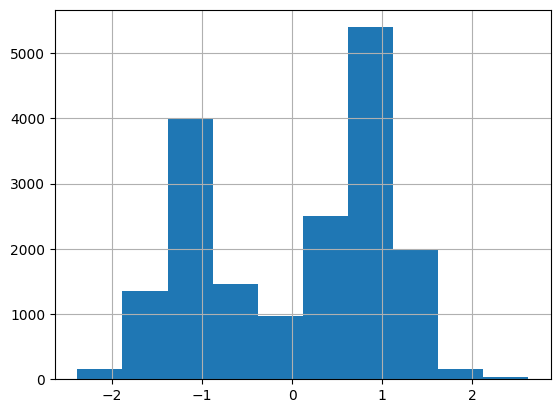

In [ ]:
pd.DataFrame(X_train)[0].hist()

<Axes: >

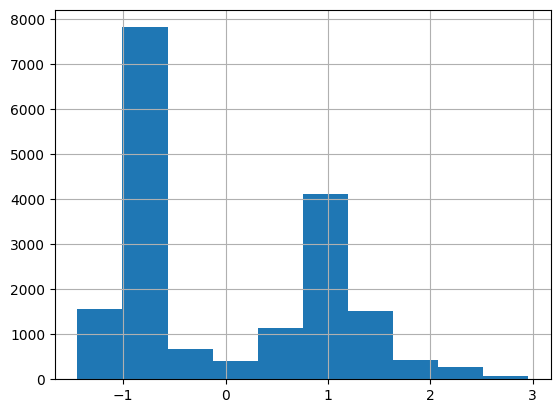

In [ ]:
pd.DataFrame(X_train)[1].hist()

6.Calculate Mean Squared Error in LinearRegression Model

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

lm =LinearRegression().fit(X_train,y_train)
mse(lm.predict(X_train),y_train,squared=False),mse(lm.predict(X_val),y_val,squared=False)

(68593.05578127236, 71404.9089469599)

7.Calculate Mean Squared Error in KNeighborsRegressor Model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7).fit(X_train,y_train)
mse(knn.predict(X_train),y_train,squared=False),mse(knn.predict(X_val),y_val,squared=False)

(51713.4759100337, 62288.3516404624)

8.Calculate Mean Squared Error in RandomForestRegressor Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=10).fit(X_train,y_train)
mse(rfr.predict(X_train),y_train,squared=False),mse(rfr.predict(X_val),y_val,squared=False)

(43605.508598673834, 53348.24411489834)

9.Calculate Mean Squared Error in GradientBoostingRegressor Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = RandomForestRegressor(n_estimators=250).fit(X_train,y_train)
mse(gbr.predict(X_train),y_train,squared=False),mse(gbr.predict(X_val),y_val,squared=False)

(17809.89056411319, 49287.51172279235)